## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**

![](https://www.digitalcitizen.life/wp-content/uploads/2020/01/google_play.png)

## **Proyecto del Módulo 7: Técnicas avanzadas para ciencia de datos y empleabilidad**

Hola, ya es el último proyecto, has avanzado y aprendido mucho hasta acá. ¡Muchas felicidades!

Es hora de poner en práctica todo lo que hemos aprendido a lo largo de nuestra travesía.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que lo concluyas de manera sobresaliente.

¡Éxito!

# Objetivos
- Aplicar con éxito todos los conocimientos que has adquirido a lo largo del Bootcamp.
- Consolidar las técnicas de limpieza, entrenamiento, graficación y ajuste a modelos de *Machine Learning*.
- Generar una API que brinde predicciones como resultado a partir de datos enviados.


# Proyecto

1. Selecciona uno de los siguientes *datasets*:
  - *Reviews* de aplicaciones de la Google Play Store: https://www.kaggle.com/datasets/lava18/google-play-store-apps

Cada uno representa un *dataset*, un problema y una forma diferente de abordarlo. Tu tarea es identificar las técnicas y modelos que podrías usar para tu proyecto.

2. Debes hacer un análisis exploratorio y limpieza de los datos. Usa las ténicas que creas convenientes.

3. Entrena el modelo de *Machine Learning*, procesamiento de lenguaje natural o red neuronal que creas adecuado.

4. Genera por lo menos dos gráficas y dos métricas de rendimiento; explica las puntuaciones de rendimiento que amerite tu problema. Todas las gráficas de rendimiento que realices deben tener leyendas, colores y títulos personalizados por ti.

  - Además, antes de subir el modelo a "producción", deberás realizar un proceso de ensambles (*ensemblings*) y de ajuste de hiperparámetros o *tuning* para intentar mejorar la precisión y disminuir la varianza de tu modelo.

5. Construye una API REST en la que cualquier usuario pueda mandar datos y que esta misma devuelva la predicción del modelo que has hecho. La API debe estar en la nube, ya sea en un servicio como Netlify o Ngrok, para que pueda ser consultada desde internet.

6. Genera una presentación del problema y del modelo de solución que planteas. Muestra gráficas, datos de rendimiento y explicaciones. Esta presentación debe estar enfocada a personas que no sepan mucho de ciencia de datos e inteligencia artificial.

7. **Solamente se recibirán trabajos subidos a tu cuenta de GitHub con un README.md apropiado que explique tu proyecto**.

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones | Punto parcial
| -- | -- | -- | -- |
| Actividad 1. Limpieza y EDA | 20 | Realiza todas las tareas necesarias para hacer el EDA y la limpieza correcta, dependiendo de la problemática. Debes hacer como mínimo el análisis de completitud, escalamiento (si aplica) y tokenización (si aplica). | Realizaste solo algunas tareas de exploración y limpieza y el modelo se muestra aún con oportunidad de completitud, escalamiento y/o mejora. |
| Actividad 2. Entrenamiento del modelo | 20 | Elige el modelo y algoritmo adecuados para tu problema, entrénalo con los datos ya limpios y genera algunas predicciones de prueba. | No has realizado predicciones de prueba para tu modelo de ML y/o tu modelo muestra una precisión menor al 60 %. |
| Actividad 3. Graficación y métricas | 20 | Genera por lo menos dos gráficas y dos muestras de métricas que permitan visualizar el rendimiento y precisión del modelo que construiste. Además, realizaste los procesos de *tuning* y ensambles adecuados para tu problema. | Las gráficas no tienen leyendas y colores customizados, solo muestras una gráfica o no realizaste el *tuning* de hiperparámetros.
| Actividad 4. API REST | 20 | Generaste con éxito un *link* público en el que, por método POST, se puede mandar información y la API REST devuelve una predicción junto con el porcentaje de confianza de esta misma. | N/A
| Actividad 5. Presentación | 20 | Genera una presentación en la que establezcas como mínimo: el problema, proceso de solución, metodologías usadas, gráficas de rendimiento, demostración del modelo y aprendizajes obtenidos. Debes redactarla con términos que pueda entender cualquier persona, no solo científicos de datos. | La presentación no expone con claridad o en términos coloquiales el proceso de creación del modelo, sus ventajas y muestras de rendimiento.

**Mucho éxito en tu camino como Data Scientist.**

# Parte 1

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', 1)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
import sys
sys.path.append('lib')
from examinar import EDA

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
try:
    import squarify as sq
except ImportError:
    !pip install squarify  
    import squarify as sq

In [6]:
try:
    import joypy
except ImportError:
    !pip install joypy  
    import joypy

---

In [7]:
def reemplazar(texto, patron, reemplazo):
    temp = re.sub(patron, reemplazo, texto)
    return " ".join(temp.split()) 

In [8]:
def plotbarras(df, col, orden= None, clases=None,colbar=False):
    gvalor = df[col].value_counts()[:4]
    #orden = df[col].value_counts().index
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(x=col, data=df, order = orden, hue=clases) #palette='Paired'
    if colbar == False:
        for bar in ax.patches:
            if bar.get_height() == gvalor[0]:
                bar.set_color(gcolor[0])  
            elif bar.get_height() == gvalor[1]:
                bar.set_color(gcolor[1]) 
            elif bar.get_height() == gvalor[2]:
                bar.set_color(gcolor[2])
            elif bar.get_height() == gvalor[3]:
                bar.set_color(gcolor[3])
            else:
                bar.set_color('lightgrey')
    plt.xticks(rotation=90)
    plt.title('Distribución: '+ col)
    plt.savefig('Distribucion_'+ col,bbox_inches='tight')
    plt.show()  

---

In [9]:
play = pd.read_csv('data/googleplaystore.csv').dropna()
print(f'***** el dataset contine {play.shape[0]} registros y {play.shape[1]} columnas')

***** el dataset contine 9360 registros y 13 columnas


In [10]:
play.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [11]:
rplay = EDA(play)
rplay.infoplus()

,columna,tipo,total,faltantes,pct,unico
0,App,object,9360,0,100.0,8190
1,Category,object,9360,0,100.0,33
2,Rating,float64,9360,0,100.0,39
3,Reviews,object,9360,0,100.0,5990
4,Size,object,9360,0,100.0,413
5,Installs,object,9360,0,100.0,19
6,Type,object,9360,0,100.0,2
7,Price,object,9360,0,100.0,73
8,Content Rating,object,9360,0,100.0,6
9,Genres,object,9360,0,100.0,115


In [12]:
col = play.columns

In [13]:
col = play.columns
play = rplay.duplicados(col)

***** El dataset original contiene 9360 registros y 13 atributos
Total de registros unicos: 8886
Total de registros duplicados: 474
***** El dataset sin duplicados contiene 8886 registros y 13 atributos



---

## EDA

### Categoría

In [15]:
gcolor = ['#ea4235','#34a855','#4385f6','#f9bb04']

In [16]:
#list(play.columns)

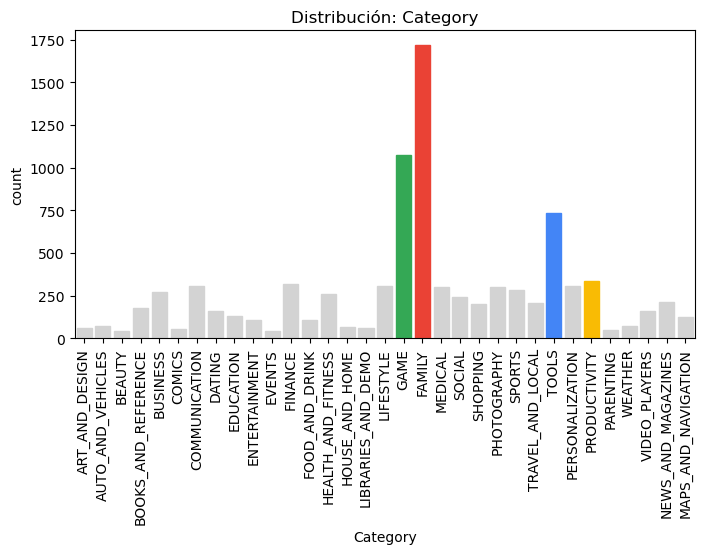

In [17]:
#orden = play['Category'].value_counts().index
plotbarras(play,'Category')

<div class="alert alert-block alert-warning">
    <b>Categorias:</b> 
    <p>Se puede observar que las principañes cuatro categorias son:
        <ul>
        <li>Familia</li>
        <li>Juegos</li>
        <li>Herramientas</li>
        <li>Productividad</li>
        </ul>
        </div>

### Valoración

In [18]:
play['Price'] = play['Price'].str.replace('$', '')
play['Price'] = play['Price'].astype('float64')

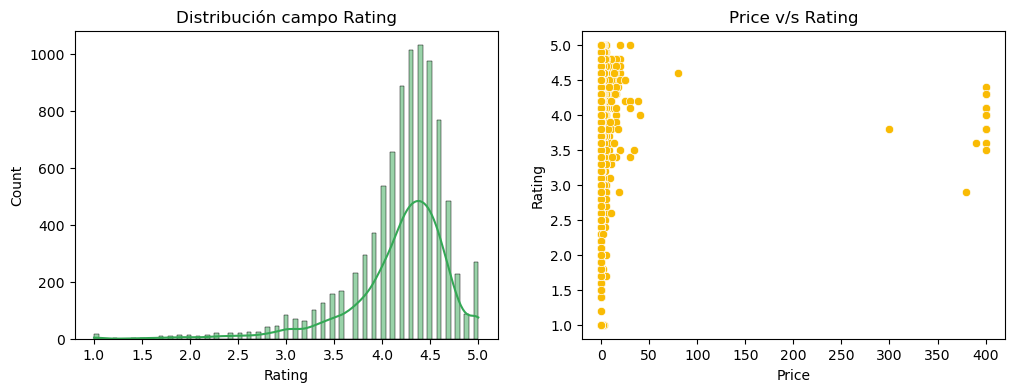

In [19]:
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
sns.histplot(play['Rating'], kde=True, color=gcolor[1])
plt.title('Distribución campo Rating')

plt.subplot(1,2,2)
sns.scatterplot(x='Price', y='Rating', data=play, color=gcolor[3])#,marker='*')
plt.title('Price v/s Rating')
plt.show()

<div class="alert alert-block alert-warning">
    <b>Example:</b> 
    <p>En los siguientes graficos, se ve algunas caracteristicas interesantes
        <ul>
        <li>Se puede observar que un sesgo, si se puede llamar así, a dar buenas valoraciones a las app.
            </li>
        <li>Las app de pago tiene como minimo tres estrellas, ¿podría ser qué se uso de forma gratuita y luego se pagó? ¿Quizás por eso no hay valoraciones negativas?</li>
        </ul>
</div>

### Reviews

In [20]:
play['Reviews'] = play['Reviews'].astype(int)

### Descargas

In [21]:
play['Descargas'] = play['Installs'].str.replace('+', '').str.replace(',', '').astype(int)
#play['Descargas']

### Tamaño
### Tipo
### Precio
### Calificación
### Genero

### Versión Android

In [22]:
rmplzr = {'- 6.0':'and up','- 7.1.1':'and up','- 8.0':'and up','and up':'','4.0.3':'4.0','2.3.3':'2.3','4.4W':'4.4',
          '2.0.1':'2.0','4.2':'4.1','2.1':'2.0','4.3':'4.1','3.2':'3.0','5.1':'5.0','7.1':'7.0','3.1':'3.0'}

In [23]:
play['Android base'] = play['Android Ver']
for llave in rmplzr:
    valor = rmplzr[llave]
    play['Android base'] = play['Android base'].apply(lambda x : reemplazar(x, llave, valor))    

In [24]:
android_order = []
for item in play['Android base'].unique():
    #print(item)
    android_order.append(item)
android_order.sort()

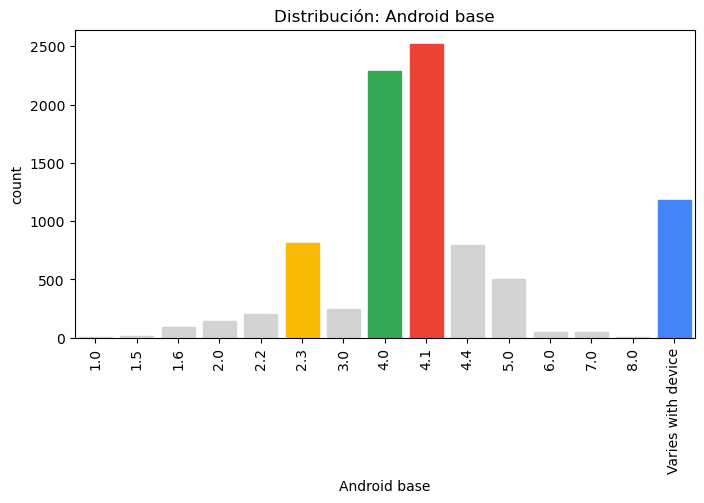

In [25]:
orden = android_order #play['Android base'].value_counts().index
plotbarras(play,'Android base',orden)

<div class="alert alert-block alert-warning">
    <b>Android:</b> 
    <p>Según el gráfico, se observa que la version más actual es la 8.0 (Oreo)
    <br>La versón Android para el desarrollo de app, mayoritariamente es la 4.1 (Jelly Bean)
    <br>La mayoria de los usuarios usan versiones antiguas en sus equipos
    <br>¿Tantas versiones de Andorid, generarán algún problema?
</div>

## Análisis

In [26]:
muestra = play[play['Category'].isin(['FAMILY','GAME','TOOLS','PRODUCTIVITY'])]

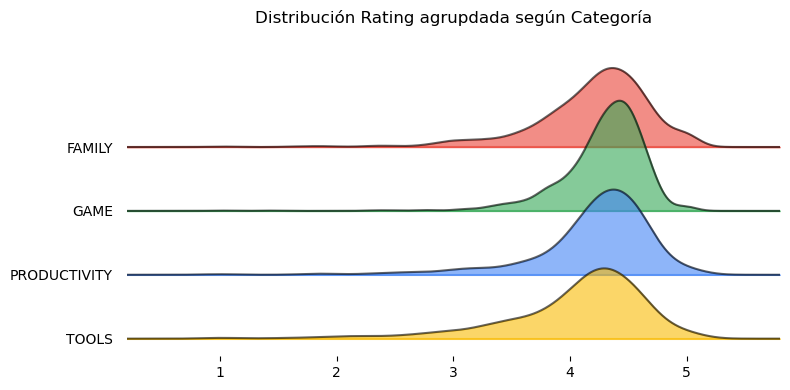

In [30]:
fig, axes = joypy.joyplot(muestra, 
                          column = ['Rating'],
                          by='Category', 
                          #ylim='own', 
                          figsize=(8,4), 
                          legend=False, 
                          #grid = True,
                          color=gcolor, 
                          #hist = True, bins = 50,
                          title = 'Distribución Rating agrupdada según Categoría',
                          alpha=0.6)
plt.savefig('joyplot',bbox_inches='tight')

<div class="alert alert-block alert-warning">
    <b>Distribución:</b> 
    <p>Se puede observar la distribución de las principales cuatro categorias</div>

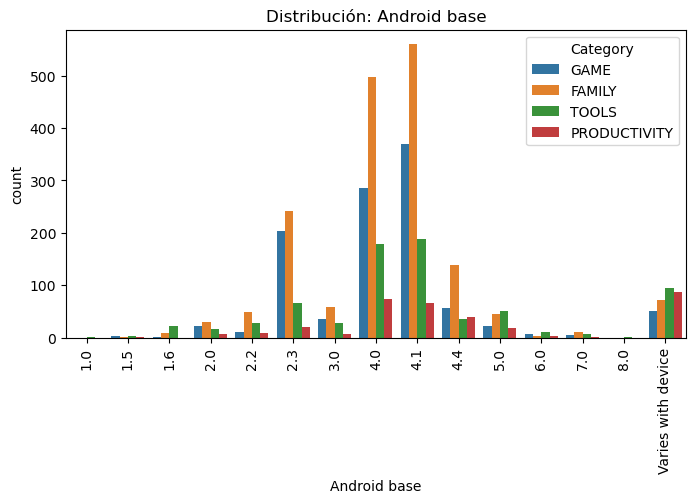

In [31]:
plotbarras(muestra,'Android base',android_order,'Category',True)

<div class="alert alert-block alert-warning">
    <b>Android/Categorias:</b> 
    <p>Ahora visualizamos cual es la cuota de mercado para las versiones de Android segun las principales categorias</div>

In [32]:
#orden = android_order #play['Android base'].value_counts().index
#plotbarras(muestra,'Rating',android_order,'Category',True)

In [33]:
play.describe()

,Rating,Reviews,Price,Descargas
count,8886.000000,8.886000e+03,8886.000000,8.886000e+03
mean,4.187959,4.730928e+05,0.963526,1.650061e+07
std,0.522428,2.906007e+06,16.194792,8.640413e+07
min,1.000000,1.000000e+00,0.000000,1.000000e+00
25%,4.000000,1.640000e+02,0.000000,1.000000e+04
50%,4.300000,4.723000e+03,0.000000,5.000000e+05
75%,4.500000,7.131325e+04,0.000000,5.000000e+06
max,5.000000,7.815831e+07,400.000000,1.000000e+09


### Aplicación de mayor valor

In [34]:
play[play['Price']== play['Price'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Descargas,Android base
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,"10,000+",Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,10000,4.1


### Cantidad de aplicaciones más descargadas

In [84]:
play[play['Descargas']== play['Descargas'].max()].shape[0]

49

### Cantidad de aplicaciones con mayor valoración

In [86]:
play[(play['Rating'] == play['Rating'].max()) &
    (play['Type'] == 'Free')].shape[0]

243

### Cantidad de app con la versión Android más usada

In [83]:
play[play['Android base']== '4.1'].shape[0]

2517

In [81]:
def bloques(features):
    data = play[features].value_counts().reset_index()#.rename(columns={features: 'labels', 0: 'count'}) #dict(play[features].value_counts())
    #print(data)
    llave = data.iloc[:,0]
    valor = data.iloc[:,1]
    ax = sq.plot(sizes = valor,
            color=sns.color_palette('Paired', len(valor)), #Spectral  #Paired
            label = llave,
            #text_kwargs={'fontsize':5, 'fontname':"Times New Roman Bold",'weight':'bold'},
            pad = True,
            alpha=0.9
           )
    plt.axis("off")
    plt.show()

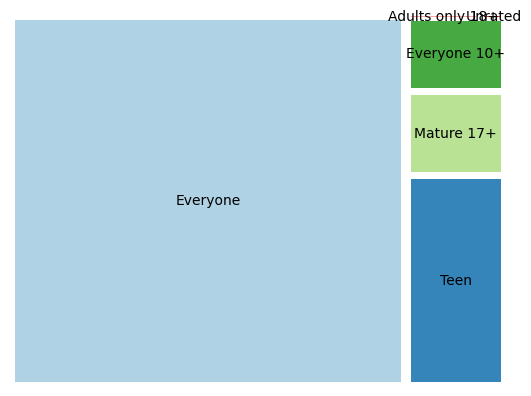

In [82]:
bloques(['Content Rating'])

<div class="alert alert-block alert-warning">
    <b>Calificacón de contenido:</b> 
    <p>En esta representación de "Tree map", se observa cuales son las calificaciones de contenido más populares</div>

In [41]:
play['Category'].value_counts()

Category
FAMILY                 1717
GAME                   1074
TOOLS                  733 
PRODUCTIVITY           334 
FINANCE                317 
PERSONALIZATION        308 
COMMUNICATION          307 
LIFESTYLE              305 
PHOTOGRAPHY            304 
MEDICAL                302 
SPORTS                 286 
BUSINESS               270 
HEALTH_AND_FITNESS     262 
SOCIAL                 244 
NEWS_AND_MAGAZINES     214 
TRAVEL_AND_LOCAL       205 
SHOPPING               202 
BOOKS_AND_REFERENCE    177 
VIDEO_PLAYERS          160 
DATING                 159 
EDUCATION              129 
MAPS_AND_NAVIGATION    124 
ENTERTAINMENT          111 
FOOD_AND_DRINK         106 
WEATHER                75  
AUTO_AND_VEHICLES      73  
HOUSE_AND_HOME         68  
LIBRARIES_AND_DEMO     64  
ART_AND_DESIGN         61  
COMICS                 58  
PARENTING              50  
EVENTS                 45  
BEAUTY                 42  
Name: count, dtype: int64